Support Vector Machine (SVM)

In [1]:
"""
( Main Purpose of SVM )
    SVM draws a hyper plane in n dimensional space such that it maximizes margin between classification groups. 

Usecases:
- Used in image classification, image segmentation and object detection
- Used in protein classification in field of biology (identify accurately more than 90% compound)
- Used in digital character recognition

How we can select best decision boundry?
- SVM help us to decide best one   
- See decision_boundry picture in folder
- Margin is also known as Support Vectors.

Features -> classification decision boundry
- Two (2D) -> Straight line
- Three (3D) -> 2D plane
- nD -> Hard to visualize although we can calculate plane mathematically and we call it as 'Hyper plane'

Gamma: (Two ways: prefer anyone based on situation) | Decision Boundry
    1. High gamma -> Not included far away point in margin calculation 
    2. Low gamma -> included far away point in margin calculation

Regularization (C): (Two way prefer anyone based on situation) | Decision Boundry
    1. High Regularization (C) -> Granually overfit with min. classification errors, take more computation time
    2. Low Regularization (C) -> Tolerate classification errors and draw smooth line, take less computation time

Kernel (special_case):
    - if we can't draw boundry or line! How we can use SVM?
    - flipped the plane such that y axis is perpendicular to the screen
    - z = x^2 + y^2, Created Z axis by transforming X and Y axis [ Z is known as kernel ]
    - Draw classification boundry

"""

"\nUsecases:\n- Used in image classification, image segmentation and object detection\n- Used in protein classification in field of biology (identify accurately more than 90% compound)\n- Used in digital character recognition\n\nHow we can select best decision boundry?\n- SVM help us to decide best one   \n- See decision_boundry picture in folder\n- Margin is also known as Support Vectors.\n\nFeatures -> classification decision boundry\n- Two (2D) -> Straight line\n- Three (3D) -> 2D plane\n- nD -> Hard to visualize although we can calculate plane mathematically and we call it as 'Hyper plane'\n\n( Main Purpose of SVM )\n    SVM draws a hyper plane in n dimensional space such that it maximizes margin between classification groups. \n\nGamma: (Two ways: prefer anyone based on situation) | Decision Boundry\n    1. High gamma -> Not included far away point in margin calculation \n    2. Low gamma -> included far away point in margin calculation\n\nRegularization (C): (Two way prefer anyon

In [2]:
import pandas as pd

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
len(iris.data)

150

In [7]:
# Create df
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
# Use apply() to create new column from exiting column in df | func as an input
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df[95:105]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [14]:
# For visualization, create separate df for each flower
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

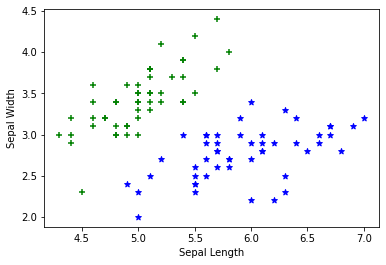

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker="*")

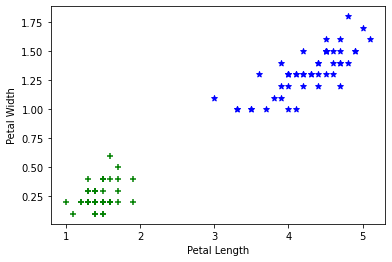

In [16]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker="+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker="*")

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X = df.drop(['target', 'flower_name'], axis="columns")
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(X_train)

120

In [21]:
len(X_test)

30

In [22]:
# Train Using Support Vector Machine (SVM) | Support Vector Classifier (SVC)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [23]:
model.score(X_test, y_test)

0.9333333333333333

In [24]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0])

In [25]:
y_test.head()

38    0
7     0
93    1
30    0
98    1
Name: target, dtype: int32

In [26]:
model.predict([[6.4, 3.2, 4.5, 1.5]])

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [27]:
"""
Tune Parameters:
    - Tuning parameters is essential for optimizing the performance of a machine learning model. 

    - Hyperparameters are settings that are not learned directly from the data during the training process, but rather they are set before training and affect the behavior and performance of the model.

The default parameter of SVM algorithm are shown below;
    C = 1.0
    kernel = 'rbf'
    degree = 3
    gamma = 'scale'

"""

"\nTune Parameters:\n    - Tuning parameters is essential for optimizing the performance of a machine learning model. \n\n    - Hyperparameters are settings that are not learned directly from the data during the training process, but rather they are set before training and affect the behavior and performance of the model.\n\nThe default parameter of SVM algorithm are shown below;\n    C = 1.0\n    kernel = 'rbf'\n    degree = 3\n    gamma = 'scale'\n\n"

In [28]:
# 1. Regularization (C)
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [29]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [30]:
# 2. Gamma
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

In [31]:
# 3. Kernel 
model_linear_kernel = SVC(kernel="linear") 
model_linear_kernel.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
model_linear_kernel.score(X_test, y_test)

0.9333333333333333